In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

file_name = "/kaggle/input/task05/US_Accidents_March23.csv" 

try:
    df = pd.read_csv(file_name, low_memory=False) 
    
    print("--- First 5 Rows (Head) ---")
    print(df.head())
    
    print("\n--- Column Names and Data Types (Info) ---")
    df.info()

except FileNotFoundError:
    print(f"Error: The file {file_name} was not found. Please check the file path.")

--- First 5 Rows (Head) ---
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  Fals

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


1. Loading and Preparing Data...
2. Generating Hotspot Visualization...


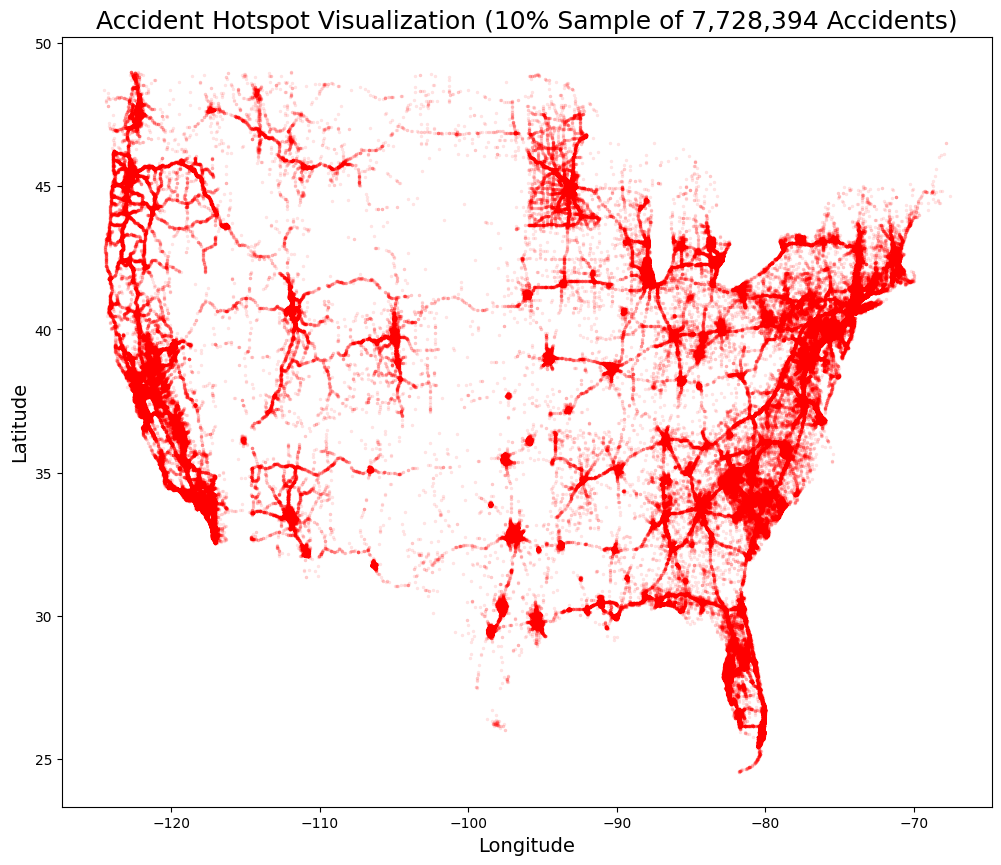

3. Analyzing Patterns by Time of Day and Day of Week...


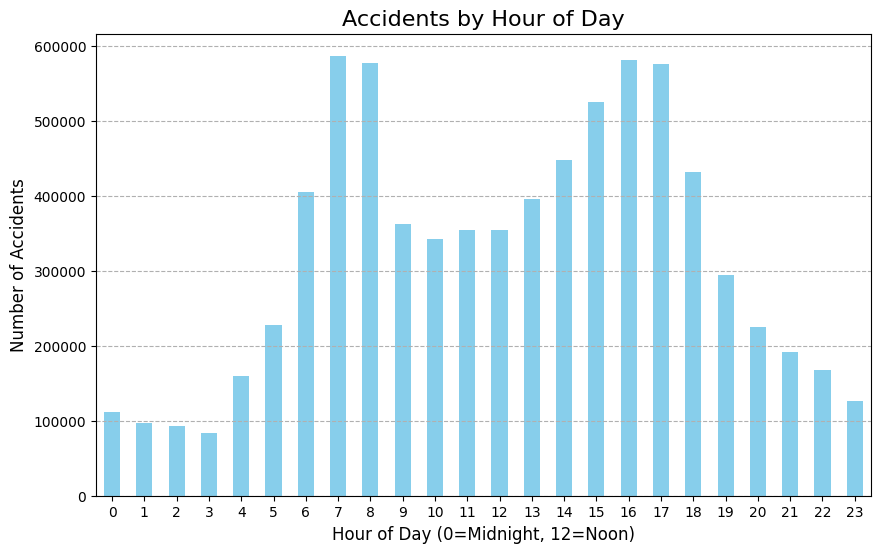

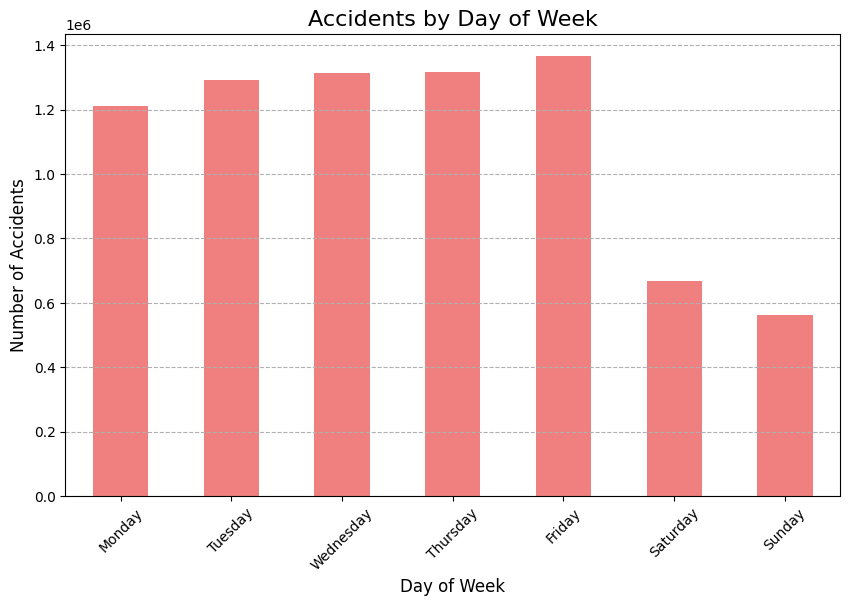

4. Analyzing Contributing Factors (Weather and Twilight)...


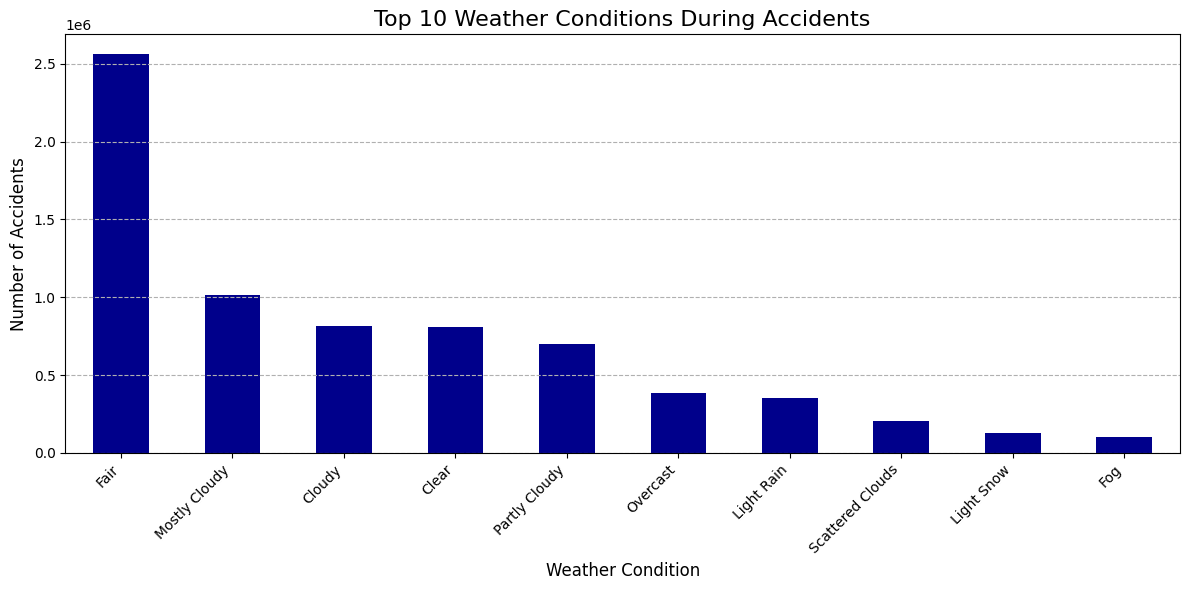

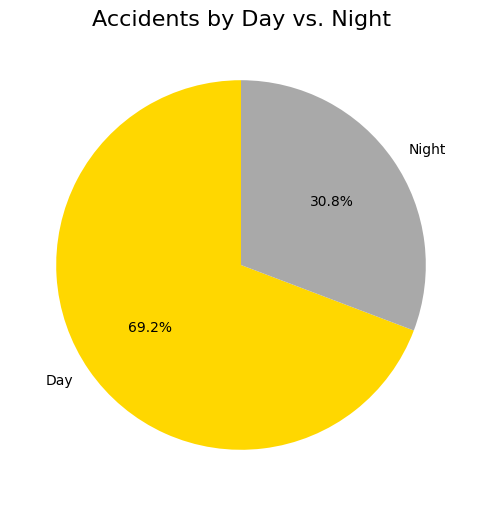


Task 5 Analysis Complete. Check the generated visualizations.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ⚠️ IMPORTANT: Replace this with the exact file name you are using
FILE_NAME = "/kaggle/input/task05/US_Accidents_March23.csv" 
ACCIDENT_COUNT = 7728394

# --- 1. Data Loading and Preparation (CORRECTED) ---
print("1. Loading and Preparing Data...")

# Use the relevant columns
COLUMNS_TO_USE = [
    'Start_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Sunrise_Sunset', 'Temperature(F)', 'Visibility(mi)', 'Junction',
    'Traffic_Signal', 'Stop'
]
try:
    df = pd.read_csv(FILE_NAME, usecols=COLUMNS_TO_USE, low_memory=False)
except FileNotFoundError:
    print(f"Error: The file {FILE_NAME} was not found. Please check the file path.")
    exit()

# CORRECTED LINE: Use format='mixed' to handle slight variations in time format (like fractional seconds)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

# Extract time-related features
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# --- 2. Hotspot Visualization (Latitude and Longitude) ---
print("2. Generating Hotspot Visualization...")

# For efficiency with a huge dataset, we sample a subset for the scatter plot
df_sample = df.sample(frac=0.1, random_state=42) # Use 10% sample

plt.figure(figsize=(12, 10))
# Create a scatter plot of accidents (hotspots will show as denser regions)
sns.scatterplot(
    x=df_sample['Start_Lng'],
    y=df_sample['Start_Lat'],
    s=5, # Size of dots
    alpha=0.1, # Opacity (to show density)
    edgecolor=None,
    color='red'
)
plt.title(f'Accident Hotspot Visualization (10% Sample of {ACCIDENT_COUNT:,} Accidents)', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show() # 

# --- 3. Time-of-Day Analysis ---
print("3. Analyzing Patterns by Time of Day and Day of Week...")

# Accident count by Hour of Day
hourly_accidents = df.groupby('Hour').size()

plt.figure(figsize=(10, 6))
hourly_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0=Midnight, 12=Noon)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Accident count by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_accidents = df['Day_of_Week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
daily_accidents.plot(kind='bar', color='lightcoral')
plt.title('Accidents by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# --- 4. Factor Analysis (Weather and Time of Day) ---
print("4. Analyzing Contributing Factors (Weather and Twilight)...")

# Top 10 Weather Conditions
top_10_weather = df['Weather_Condition'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_weather.plot(kind='bar', color='darkblue')
plt.title('Top 10 Weather Conditions During Accidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Accidents by Sunrise/Sunset (Day/Night)
twilight_accidents = df['Sunrise_Sunset'].value_counts()

plt.figure(figsize=(6, 6))
twilight_accidents.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'darkgray'])
plt.title('Accidents by Day vs. Night', fontsize=16)
plt.ylabel('') # Hide y-label for pie chart
plt.show()

print("\nTask 5 Analysis Complete. Check the generated visualizations.")

1. Loading Data for Road Condition Analysis...
2. Calculating feature frequencies...
3. Generating Road Feature Visualization...


/tmp/ipykernel_92/3053502392.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.1f}M'.format(x/1_000_000) for x in ticks])


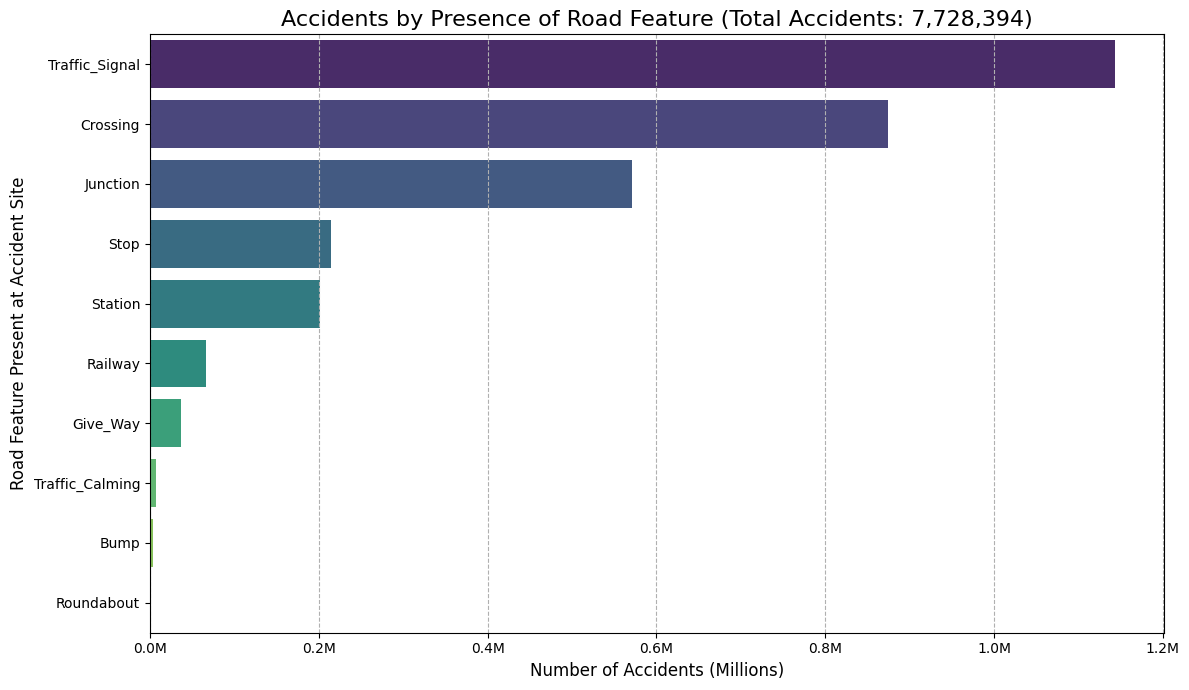

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ IMPORTANT: Replace this with the exact file name you are using
FILE_NAME = "/kaggle/input/task05/US_Accidents_March23.csv" 
ACCIDENT_COUNT = 7728394 # Total number of records (optional, but good for context)

# --- 1. Load Data for Road Condition Analysis ---
print("1. Loading Data for Road Condition Analysis...")

# Use only the Boolean columns relevant to road features
ROAD_COLUMNS = [
    'Junction', 'Traffic_Signal', 'Stop', 'Crossing', 'Bump',
    'Give_Way', 'Railway', 'Roundabout', 'Station', 'Traffic_Calming'
]

try:
    # Load the data - only reading the required road feature columns
    df_road = pd.read_csv(FILE_NAME, usecols=ROAD_COLUMNS, low_memory=False)
except FileNotFoundError:
    print(f"Error: The file {FILE_NAME} was not found. Please check the file path.")
    exit()

# --- 2. Calculate Accident Counts by Road Feature ---
print("2. Calculating feature frequencies...")

# Sum the True values (accidents where the feature was present)
road_factors = df_road[ROAD_COLUMNS].sum()

# Convert to a DataFrame and sort the values
road_factors_df = road_factors.sort_values(ascending=False).to_frame(name='Accident_Count')

# FIX: Reset the index so the feature names become a column named 'Road_Feature'
road_factors_plot = road_factors_df.reset_index().rename(columns={'index': 'Road_Feature'})


# --- 3. Visualization ---
print("3. Generating Road Feature Visualization...")

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Accident_Count',
    y='Road_Feature',
    data=road_factors_plot, # Use the new DataFrame with 'Road_Feature' as a column
    palette='viridis'
)
plt.title(f'Accidents by Presence of Road Feature (Total Accidents: {ACCIDENT_COUNT:,})', fontsize=16)
plt.xlabel('Number of Accidents (Millions)', fontsize=12)
plt.ylabel('Road Feature Present at Accident Site', fontsize=12)

# Adjust x-axis labels to display in millions for better readability
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.1f}M'.format(x/1_000_000) for x in ticks])

plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()